In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from numba import njit, prange

In [4]:
@njit
def bandit_changing_means(means, epsilon, steps, std=1, alpha=0):
    k = means.size
    Q = np.zeros(k)
    N = np.zeros(k)
    
    step_result = np.zeros(steps)
    
    for step in prange(steps):
        A = np.argmax(Q) if np.random.uniform(0, 1) > epsilon else np.random.randint(0, k)
        R = np.random.normal(means[A], std)
        N[A] += 1
        Q[A] += alpha * (R - Q[A]) if alpha else (R - Q[A]) / N[A]
        step_result[step] = np.sum(Q * N) / np.sum(N)
        means += np.random.normal(0, 0.01, k)
    
    return step_result

  0%|          | 0/100 [00:00<?, ?it/s]

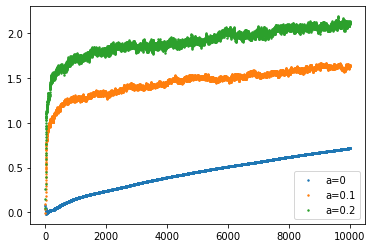

In [5]:
steps = 10_000
games = 100
alphas = [0, 0.1, 0.2]
y_values = np.zeros((len(alphas), steps))

for g in tqdm(range(1, games + 1)):
    means = np.zeros(10)
    for i_a, a in enumerate(alphas):
        y_values[i_a] += (bandit_changing_means(means, 0.1, steps, alpha=a) - y_values[i_a]) / g

for i_a, a in enumerate(alphas):
    plt.scatter(range(steps), y_values[i_a], label=f'a={a}', s=2)

plt.legend()